## Library Imports

In [1]:
from AlexNet import AlexNet
from VGG16 import VGG16
from prepare_data import *
from utils import *
from train import parse_yml
from train import *

## Data Initilization + Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


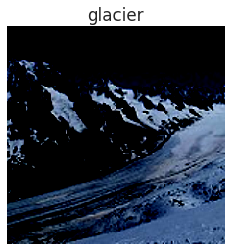

In [4]:
#obtain dataset
train_dataset,val_dataset = create_dataset()

#obtain dataloaders
trainloader, testloader = create_dataloader(train_dataset, val_dataset)

#display dataset
display_images(train_dataset)

In [11]:
device= torch.device(("cuda:1") if torch.cuda.is_available() else "cpu")
def check_forward_pass(model, data_loader):
    #_, _, device = parse_yml()
    net_batch = model.to(device)
    
    batch = next(iter(data_loader))
    images, labels = batch

    images = images.to(device)
    labels = labels.to(device)
    
    logits = net_batch(images)
    return logits



In [12]:
# check forward pass utility
logit = check_forward_pass(AlexNet(), trainloader)
print("forward pass dim:", logit.shape)

forward pass dim: torch.Size([16, 6])


In [6]:
train_dataset[0][0].shape

torch.Size([3, 227, 227])

## Train Model

#### Sanity Check

In [ ]:
loss_vals = sanity_check_train(AlexNet(), trainloader)
convergence_graph(loss_vals)

#### Train Full Model

In [ ]:
model = AlexNet()
val = train_model(model, trainloader, save_weights=True, state_dict_path="weights.pth")
convergence_graph(val)

In [ ]:
vgg16 = VGG16()
vg_val = train_model(vgg16, trainloader, save_weights=True, state_dict_path="vgg_weights.pth")
convergence_graph(vg_val)

#### Use Pretrained Model:

In [18]:
alex_net = AlexNet(pretrained=True, state_dict_path="alexNet_weights.pth")

next(alex_net.parameters()).is_cuda

In [19]:
vgg_net = VGG16(pretrained=True, state_dict_path="vgg_weights.pth")

next(vgg_net.parameters()).is_cuda

RuntimeError: CUDA error: out of memory

## Save Model

In [ ]:
checkpoint = {'model': AlexNet(),
          'state_dict': model.state_dict(),
          'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

##  Model Accuracy + Visualization

In [ ]:
# Alex Net Accuracy

check_accuracy(alex_net , trainloader);
check_accuracy(alex_net, testloader);

In [ ]:
# VGG Accuracy

mist_train_img, mist_train_lbl, train_true_lbl, train_pred, train_lbl = check_accuracy(vgg_net , trainloader)
mist_test_img, mist_test_lbl, test_true_lbl, test_pred, test_lbl = check_accuracy(vgg_net, testloader)

In [ ]:
display_false_images(mist_test_img, mist_test_lbl, test_true_lbl)

In [ ]:
confusion_matrix_ut(test_lbl, test_pred)

In [ ]:
# data aug
# check groundtruths
# Resnet